In [2]:
import numpy as np

1. Решите линейную систему:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1} &amp; \mathbf{2} &amp; \mathbf{3} \\
\mathbf{4} &amp; \mathbf{0} &amp; \mathbf{6} \\
\mathbf{7} &amp; \mathbf{8} &amp; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{12} \\
\mathbf{2} \\
\mathbf{1}
\end{vmatrix}
\end{equation*}$$

In [3]:
A = np.array([[1, 2, 3], [4, 0, 6], [7, 8, 9]], float)
b = np.array([12, 2, 1], float)
A

array([[1., 2., 3.],
       [4., 0., 6.],
       [7., 8., 9.]])

In [4]:
b

array([12.,  2.,  1.])

In [5]:
det_A = np.linalg.det(A)
det_A

59.999999999999986

In [7]:
# определитель матрицы A не равен нулю, найдем решение СЛАУ
X1 = np.linalg.solve(A, b)
X2 = np.dot(np.linalg.inv(A), b)
print(X1)
print(X2)

[-9.2         0.9         6.46666667]
[-9.2         0.9         6.46666667]


In [8]:
# проверка:
print(np.dot(A, X1))
print(np.dot(A, X2))

[12.  2.  1.]
[12.  2.  1.]


#### 2. Найдите псевдорешение:
x + 2y – z = 1
3x – 4y = 7
8x – 5y + 2z = 12
2x – 5z = 7
11x +4y – 7z = 15


In [9]:
A = np.array([[1, 2, -1], [3, -4, 0], [8, -5, 2], [2, 0, -5], [11, 4, -7]], float)
b = np.array([1, 7, 12, 7, 15], float)
A

array([[ 1.,  2., -1.],
       [ 3., -4.,  0.],
       [ 8., -5.,  2.],
       [ 2.,  0., -5.],
       [11.,  4., -7.]])

In [10]:
b

array([ 1.,  7., 12.,  7., 15.])

In [11]:
X = np.linalg.lstsq(A, b, rcond=None)[0]
X

array([ 1.13919353, -0.90498444, -0.9009803 ])

In [12]:
# проверка:
print(np.dot(A, X))

[ 0.23020495  7.03751834 11.83650981  6.78328855 15.21805313]


#### 3. Сколько решений имеет линейная система:
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1} &amp; \mathbf{2} &amp; \mathbf{3} \\
\mathbf{4} &amp; \mathbf{5} &amp; \mathbf{6} \\
\mathbf{7} &amp; \mathbf{8} &amp; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{12} \\
\mathbf{2} \\
\mathbf{1}
\end{vmatrix}
\end{equation*}$$



Если ноль – то измените вектор правой части так, чтобы система стала совместной, и решите ее. 


In [13]:
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]], float)
b = np.array([[12, 2, 0]], float)

det_A = np.linalg.det(A)

print(np.round(det_A))

0.0


In [14]:
# определитель матрицы A равен 0
# посчитаем расширенную матрицу C
C = np.concatenate((A, b.T), axis=1)
print(C)

[[ 1.  2.  3. 12.]
 [ 4.  5.  6.  2.]
 [ 7.  8.  9.  0.]]


In [16]:
rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(rank_A, rank_C)

2 2


In [17]:
# ранг расширенной матрицы C больше ранга матрицы A
# система не имеет ни одно решения
# изменим вектор b
b = np.array([[12, 15, 18]], float)
# посчитаем расширенную матрицу C с учетом измененного вектора b
C = np.concatenate((A, b.T), axis=1)
print(C)

[[ 1.  2.  3. 12.]
 [ 4.  5.  6. 15.]
 [ 7.  8.  9. 18.]]


In [18]:
rank_A, rank_C = np.linalg.matrix_rank(A, 0.0001), np.linalg.matrix_rank(C, 0.0001)
print(rank_A, rank_C)

2 2


In [19]:
# ранги матрицы A и расширенной матрицы C совпадают
# согласно теореме Кронекера-Капелли в таком случае, есть хотя бы одно решение
# так как ранг матрицы A меньше кол-ва неизвестных, то имеется бесконечное множество решений
X = np.linalg.lstsq(A, b[0], rcond=None)[0]
print(X)

[-4.66666667  0.33333333  5.33333333]


In [20]:
# проверка:
print(np.dot(A, X))

[12. 15. 18.]


#### 4. Вычислите LU-разложение матрицы:

После этого придумайте вектор правых частей и решите полученную линейную систему трех уравнений с данной матрицей.

In [21]:
import scipy
import scipy.linalg
A = np.array([[1, 2, 3], [2, 16, 21], [4, 28, 73]], float)
print(A)

[[ 1.  2.  3.]
 [ 2. 16. 21.]
 [ 4. 28. 73.]]


In [22]:
# LU-разложение матрицы A
P, L, U = scipy.linalg.lu(A)
print(f'P: \n{P}')
print(f'L: \n{L}')
print(f'U: \n{U}')

P: 
[[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
L: 
[[ 1.    0.    0.  ]
 [ 0.25  1.    0.  ]
 [ 0.5  -0.4   1.  ]]
U: 
[[  4.    28.    73.  ]
 [  0.    -5.   -15.25]
 [  0.     0.   -21.6 ]]


In [23]:
b = np.array([4, 28, 94], float)
print(b)

[ 4. 28. 94.]


In [24]:
det_A = np.linalg.det(A)
print(np.round(det_A))

432.0


In [25]:
X = np.linalg.solve(A, b)
print(X)

[0.0462963  0.11574074 1.24074074]


In [26]:
# проверка:
print(np.dot(A, X))

[ 4. 28. 94.]


5. Найдите нормальное псевдорешение недоопределенной системы:
x + 2y – z = 1
8x – 5y + 2z = 12
Для этого определите функцию Q(x,y,z), равную норме решения, и найдите ее минимум.

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
A = np.array([[1, 2, -1], [8, -5, 2]], float)
b = np.array([1, 12], float)
print(A)
print(b)

[[ 1.  2. -1.]
 [ 8. -5.  2.]]
[ 1. 12.]


In [30]:
def Q(x, y, z):
    return (x**2 + y**2 + z**2)

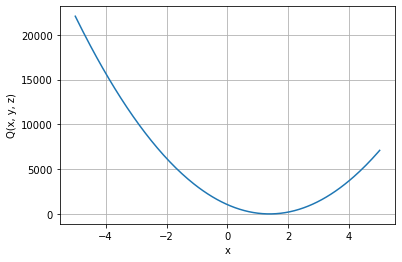

In [31]:
# итерация 1
x = np.linspace(-5, 5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

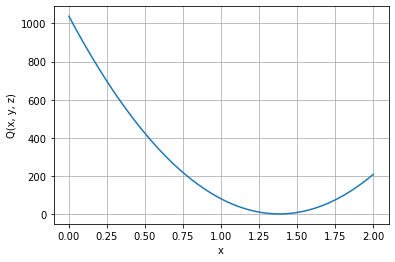

In [32]:
# итерация 2
x = np.linspace(0, 2, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

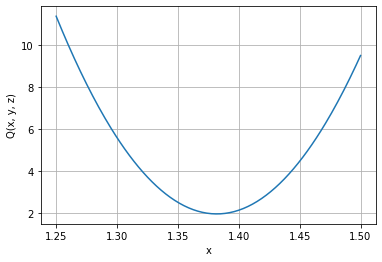

In [33]:
# итерация 3
x = np.linspace(1.25, 1.5, 201)
y = 10 * x - 14
z = x + 2 * y - 1

plt.plot(x, Q(x, y, z))
plt.xlabel('x')
plt.ylabel('Q(x, y, z)')
plt.grid(True)
plt.show()

In [35]:
# исходя из визуального анализа гарафика:
x = 1.38
y = 10 * x - 14
z = x + 2 * y - 1
X1 = np.array([x, y, z])
print(X1)

[ 1.38 -0.2  -0.02]


In [36]:
# нормальное пвсевдорешение численным методом:
X2 = np.linalg.lstsq(A, b, rcond=None)[0]
print(X2)

[ 1.38191882 -0.18081181  0.0202952 ]


In [37]:
# проверка:
print(np.dot(A, X1))
print(np.dot(A, X2))

[ 1. 12.]
[ 1. 12.]


6. Найдите одно из псевдорешений вырожденной системы.
$$\begin{equation*}
\begin{vmatrix}
\mathbf{1} &amp; \mathbf{2} &amp; \mathbf{3} \\
\mathbf{4} &amp; \mathbf{5} &amp; \mathbf{6} \\
\mathbf{7} &amp; \mathbf{8} &amp; \mathbf{9}
\end{vmatrix} * X = 
\begin{vmatrix}
\mathbf{2} \\
\mathbf{5} \\
\mathbf{11}
\end{vmatrix}
\end{equation*}$$


Попробуйте также отыскать и нормальное псевдорешение.

In [42]:
A = np.array([[1, 2, 3], [4, 5 ,6], [7, 8, 9]], float)
b = np.array([2, 5, 11])
print(A)
print(b)

[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
[ 2  5 11]


In [43]:
det_A = np.linalg.det(A)
print(np.round(det_A))

0.0


In [44]:
Q, R = np.linalg.qr(A)
print(f'Q: \n{Q}')
print(f'R: \n{R}')

Q: 
[[-0.12309149  0.90453403  0.40824829]
 [-0.49236596  0.30151134 -0.81649658]
 [-0.86164044 -0.30151134  0.40824829]]
R: 
[[-8.12403840e+00 -9.60113630e+00 -1.10782342e+01]
 [ 0.00000000e+00  9.04534034e-01  1.80906807e+00]
 [ 0.00000000e+00  0.00000000e+00 -1.77635684e-15]]


In [45]:
R1 = R[:2, :2]
print(R1)

[[-8.1240384  -9.6011363 ]
 [ 0.          0.90453403]]


In [46]:
b1 = np.dot(Q.T, b)[:2]
print(b1)

[-1.21860576e+01  8.43769499e-15]


In [47]:
# найдем псевдорешение:
X1 = np.append(np.linalg.solve(R1, b1), 0)
print(X1)

[1.50000000e+00 9.32822279e-15 0.00000000e+00]


In [ ]:
# найдем нормальное псевдорешени:
X2 = np.linalg.lstsq(A, b, rcond=None)[0]
print(X2)

In [48]:
# нормы векторов псевдорешения и нормального псевдорешения:
print(np.linalg.norm(X1))
print(np.linalg.norm(X2))

1.4999999999999896
1.3938451951505524


In [49]:
# проверка:
print(np.dot(A, X1))
print(np.dot(A, X2))

[ 1.5  6.  10.5]
[1.08118081 4.74538745 8.4095941 ]
